<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# VIX Research

To quantify the effect of volatility on our trading strategy, we will subdivide the backtest returns based on whether the VIX was above or below 20 at the time of the trading signal.

To begin, load the backtest results from earlier and extract the returns:

In [1]:
from quantrocket.moonshot import read_moonshot_csv

results = read_moonshot_csv("first_last.csv")
returns = results.loc["Return"]

# Squeeze single-column DataFrame to Series
returns = returns.squeeze()

Next, we query the VIX values as of 3:30 PM each day NY time. Since the VIX is provided by CBOE which is located in Chicago, we need the close of the 14:00:00 bar: 

In [2]:
from quantrocket import get_prices
vix = get_prices("vix-30min", 
                 fields="Close", 
                 start_date=returns.index.min(), 
                 end_date=returns.index.max(), 
                 times="14:00:00")

# extract VIX and squeeze single-column DataFrame to Series
vix = vix.loc["Close"].xs("14:00:00", level="Time").squeeze()

Next, we subdivide the returns based on the VIX:

In [4]:
returns_hivol = returns.where(vix >= 20, 0)
returns_lowvol = returns.where(vix < 20, 0)

import pandas as pd
returns = pd.concat({"VIX > 20": returns_hivol, "VIX < 20": returns_lowvol}, axis=1)

Then we plot the cumulative returns to compare:

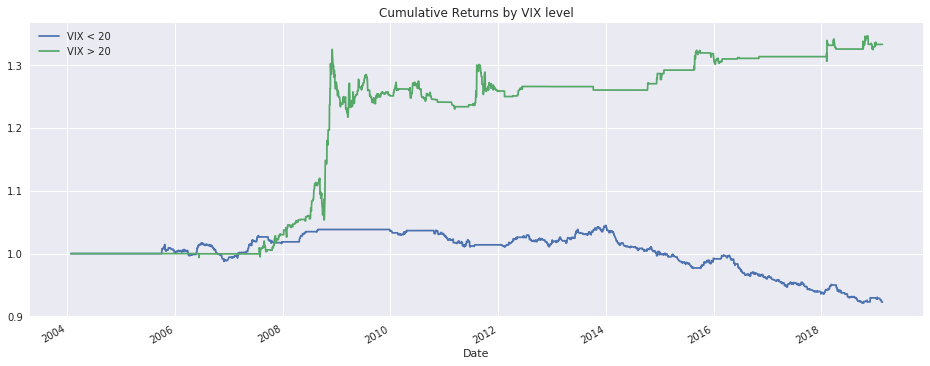

In [5]:
from moonchart import DailyPerformance
perf = DailyPerformance(returns)
perf.cum_returns.plot(title="Cumulative Returns by VIX level")

Limiting to times when the VIX was above 20, the strategy has continued to edge higher over time. When the VIX is under 20, the strategy loses money. 

***

## *Next Up*

Part 5: [Moonshot Backtest With VIX Filter](Part5-Moonshot-Backtest-With-VIX-Filter.ipynb)